In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np   #for numerical computation
#for visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline
import sys
import tkinter as tk

In [2]:
#to display all the rows while checking the dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [48]:
#importing datasets of stop and search data from January to Novemeber 2021
df1 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df2 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df3 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df4 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df5 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df6 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df7 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df8 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df9 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df10 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])
df11 = pd.read_csv("2021-01-cleveland-stop-and-search.csv",parse_dates = ["Date"])


In [4]:
#concatenating all the datasets to a single dataframe
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8,df9,df10, df11], ignore_index=True)

In [5]:
#checking the first 5 columns using head function
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2021-01-01 03:03:19+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
1,Person search,2021-01-01 08:08:47+00:00,NaN,NaN,54.550096,-1.169601,Male,25-34,Other ethnic group - Not stated,Other,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Khat or Cannabis warning,False,NaN
2,Person search,2021-01-01 11:11:50+00:00,NaN,NaN,54.595278,-1.288708,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
3,Person search,2021-01-01 17:17:01+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,NaN
4,Person search,2021-01-01 17:17:01+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN


In [6]:
#checking basic information about dataset using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype              
---  ------                                    --------------  -----              
 0   Type                                      5707 non-null   object             
 1   Date                                      5707 non-null   datetime64[ns, UTC]
 2   Part of a policing operation              0 non-null      float64            
 3   Policing operation                        0 non-null      float64            
 4   Latitude                                  3747 non-null   float64            
 5   Longitude                                 3747 non-null   float64            
 6   Gender                                    5037 non-null   object             
 7   Age range                                 4983 non-null   object             
 8   Self-defined ethnicity                    4317 non-null   

In [7]:
#Finding proportion of missing data in the dataframe
df.isnull().sum()/len(df)

Type                                        0.000000
Date                                        0.000000
Part of a policing operation                1.000000
Policing operation                          1.000000
Latitude                                    0.343438
Longitude                                   0.343438
Gender                                      0.117400
Age range                                   0.126862
Self-defined ethnicity                      0.243561
Officer-defined ethnicity                   0.220081
Legislation                                 0.004906
Object of search                            0.041002
Outcome                                     0.071842
Outcome linked to object of search          0.785877
Removal of more than just outer clothing    1.000000
dtype: float64

In [8]:
#Dropping Columns with Over 70% of Missing Values and those which are not neccessary

df1 = df.drop(columns=['Part of a policing operation','Policing operation', 'Self-defined ethnicity',
                       'Legislation','Outcome linked to object of search', 
                                  'Removal of more than just outer clothing'])

In [9]:
#checking the new dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   Type                       5707 non-null   object             
 1   Date                       5707 non-null   datetime64[ns, UTC]
 2   Latitude                   3747 non-null   float64            
 3   Longitude                  3747 non-null   float64            
 4   Gender                     5037 non-null   object             
 5   Age range                  4983 non-null   object             
 6   Officer-defined ethnicity  4451 non-null   object             
 7   Object of search           5473 non-null   object             
 8   Outcome                    5297 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 401.4+ KB


In [10]:
#changing the columns names for easy access
df1.rename(columns={'Age range': 'ageRange', 'Officer-defined ethnicity': 'ethnicity',
                   'Object of search': 'searchObject'}, 
                    inplace=True)

In [12]:
#Confirming that we dont have any more Nan Values in the dataframe 
df1.isnull().sum()

Type            0
Date            0
Latitude        0
Longitude       0
Gender          0
ageRange        0
ethnicity       0
searchObject    0
Outcome         0
dtype: int64

In [13]:
#checking the cleaned dataframe
df1.head()

,Type,Date,Latitude,Longitude,Gender,ageRange,ethnicity,searchObject,Outcome
1,Person search,2021-01-01 08:08:47+00:00,54.550096,-1.169601,Male,25-34,Other,Stolen goods,Khat or Cannabis warning
2,Person search,2021-01-01 11:11:50+00:00,54.595278,-1.288708,Male,over 34,White,Controlled drugs,A no further action disposal
7,Person search,2021-01-01 21:21:45+00:00,54.545406,-1.253929,Male,18-24,White,Controlled drugs,A no further action disposal
8,Person search,2021-01-01 21:21:50+00:00,54.545406,-1.253929,Male,18-24,White,Controlled drugs,Khat or Cannabis warning
9,Person and Vehicle search,2021-01-02 09:09:40+00:00,54.556283,-1.154523,Male,over 34,Asian,Evidence of offences under the Act,Arrest


In [14]:
#adding new column month in dataframe, month is picked from date column

df1[["month"]] = pd.DatetimeIndex(df1["Date"]).month

In [15]:
#adding new column hour in dataframe, hour is picked from date column

df1['hour'] = df1['Date'].dt.hour

In [16]:
#checking the new columns in dataframe
df1.head()

,Type,Date,Latitude,Longitude,Gender,ageRange,ethnicity,searchObject,Outcome,month,hour
1,Person search,2021-01-01 08:08:47+00:00,54.550096,-1.169601,Male,25-34,Other,Stolen goods,Khat or Cannabis warning,1,8
2,Person search,2021-01-01 11:11:50+00:00,54.595278,-1.288708,Male,over 34,White,Controlled drugs,A no further action disposal,1,11
7,Person search,2021-01-01 21:21:45+00:00,54.545406,-1.253929,Male,18-24,White,Controlled drugs,A no further action disposal,1,21
8,Person search,2021-01-01 21:21:50+00:00,54.545406,-1.253929,Male,18-24,White,Controlled drugs,Khat or Cannabis warning,1,21
9,Person and Vehicle search,2021-01-02 09:09:40+00:00,54.556283,-1.154523,Male,over 34,Asian,Evidence of offences under the Act,Arrest,1,9


In [17]:
#checking for any null values/errors in new column, month
df1.month.value_counts()

3     346
1     327
5     315
4     287
8     281
2     277
6     224
7     173
10    160
9     124
11     77
Name: month, dtype: int64

In [18]:
#checking for any null values/errors in new column, month
df1.hour.value_counts()

23    329
0     220
16    153
19    151
22    141
20    137
21    134
15    132
1     129
14    124
18    120
13    108
12     98
17     96
11     94
10     88
2      68
3      61
9      58
8      47
4      41
6      22
7      21
5      19
Name: hour, dtype: int64

In [19]:
#checking unique values in the Type column
df1.Type.unique()

array(['Person search', 'Person and Vehicle search', 'Vehicle search'],
      dtype=object)

In [20]:
#to check Value count for Type
df1['Type'].value_counts()

Person search                2302
Person and Vehicle search     277
Vehicle search                 12
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

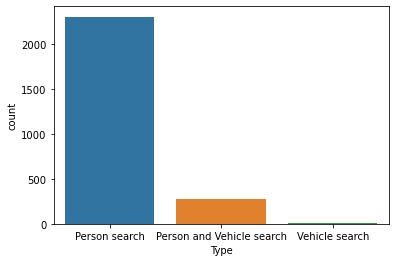

In [21]:
#Count plot to show frequency of unique values in Type column
sns.countplot(x='Type', data=df1)

In [22]:
#Checking unique values in Age range column
df1['ageRange'].unique()

array(['25-34', 'over 34', '18-24', '10-17', 'under 10'], dtype=object)

In [23]:
#checking Value count  in Age range column
df1['ageRange'].value_counts()

over 34     1019
25-34        736
18-24        535
10-17        300
under 10       1
Name: ageRange, dtype: int64

<AxesSubplot:xlabel='ageRange', ylabel='count'>

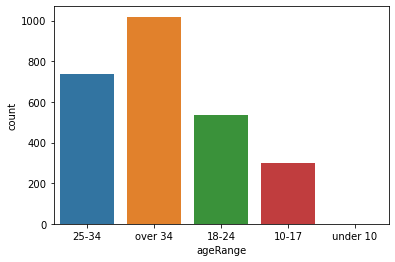

In [24]:
#Count plot to show frequency of unique values in Age range column
sns.countplot(x='ageRange', data=df1)

In [25]:
#Checking unique values in ethnicity  column
df1['ethnicity'].unique()

array(['Other', 'White', 'Asian', 'Black'], dtype=object)

In [26]:
#checking Value count  in ethnicity column
df1['ethnicity'].value_counts()

White    2361
Asian     128
Black      56
Other      46
Name: ethnicity, dtype: int64

<AxesSubplot:xlabel='ethnicity', ylabel='count'>

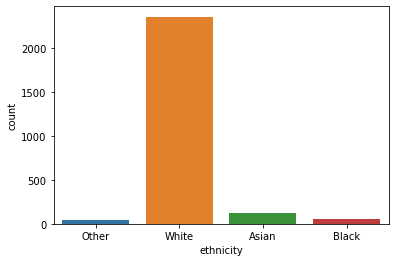

In [27]:
#Count plot to show frequency of unique values in ethnicity column
sns.countplot(x='ethnicity', data=df1)

In [29]:
#Checking unique values in searchObject  column
df1['searchObject'].unique()

array(['Stolen goods', 'Controlled drugs',
       'Evidence of offences under the Act', 'Article for use in theft',
       'Offensive weapons', 'Anything to threaten or harm anyone',
       'Articles for use in criminal damage', 'Firearms'], dtype=object)

In [30]:
#checking Value count  in searchObject column
df1['searchObject'].value_counts()

Controlled drugs                       1662
Article for use in theft                306
Offensive weapons                       268
Stolen goods                            128
Anything to threaten or harm anyone     106
Articles for use in criminal damage      49
Evidence of offences under the Act       48
Firearms                                 24
Name: searchObject, dtype: int64

In [31]:
#Checking unique values in Outcome column
df1['Outcome'].unique()

array(['Khat or Cannabis warning', 'A no further action disposal',
       'Arrest', 'Caution (simple or conditional)',
       'Summons / charged by post', 'Community resolution'], dtype=object)

In [32]:
#Checking unique values in Outcome  column
df1['Outcome'].value_counts()

A no further action disposal       2048
Arrest                              405
Khat or Cannabis warning             68
Community resolution                 38
Summons / charged by post            18
Caution (simple or conditional)      14
Name: Outcome, dtype: int64

In [33]:
#Checking unique values in Gender  column
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
#checking Value count  in Gender column
df1['Gender'].value_counts()

Male      2289
Female     302
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

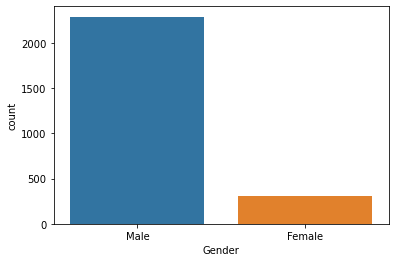

In [35]:
#Count plot to show frequency of unique values in ethnicity column
sns.countplot(x='Gender', data=df1)

<AxesSubplot:xlabel='month', ylabel='count'>

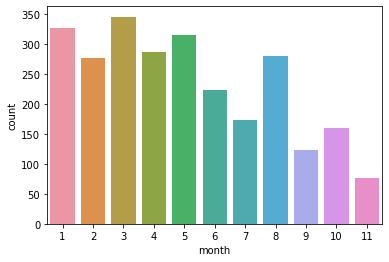

In [36]:
#Count plot to show frequency of unique values in month column
sns.countplot(x='month', data=df1)

<AxesSubplot:xlabel='hour', ylabel='count'>

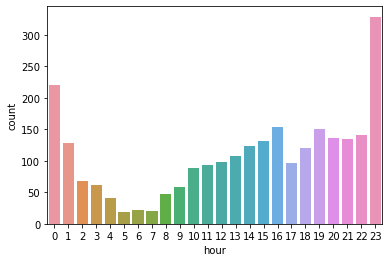

In [37]:
#Count plot to show frequency of unique values in hour column
sns.countplot(x='hour', data=df1)

Text(0.5, 1.0, 'Stop and Search Activity across months')

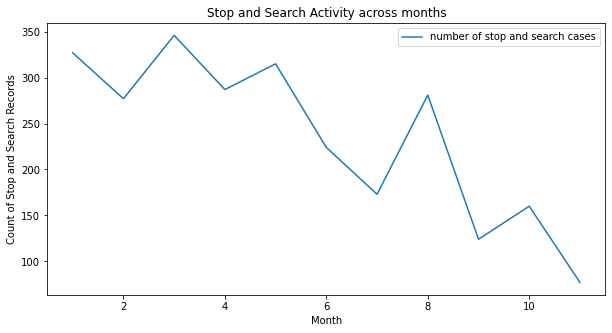

In [38]:
plot_month = df1.groupby('month').size().reset_index(name='number of stop and search cases').set_index('month')
plot_month.plot(kind='line', figsize=(10,5));
plt.xlabel('Month')
plt.ylabel('Count of Stop and Search Records')
plt.title('Stop and Search Activity across months')

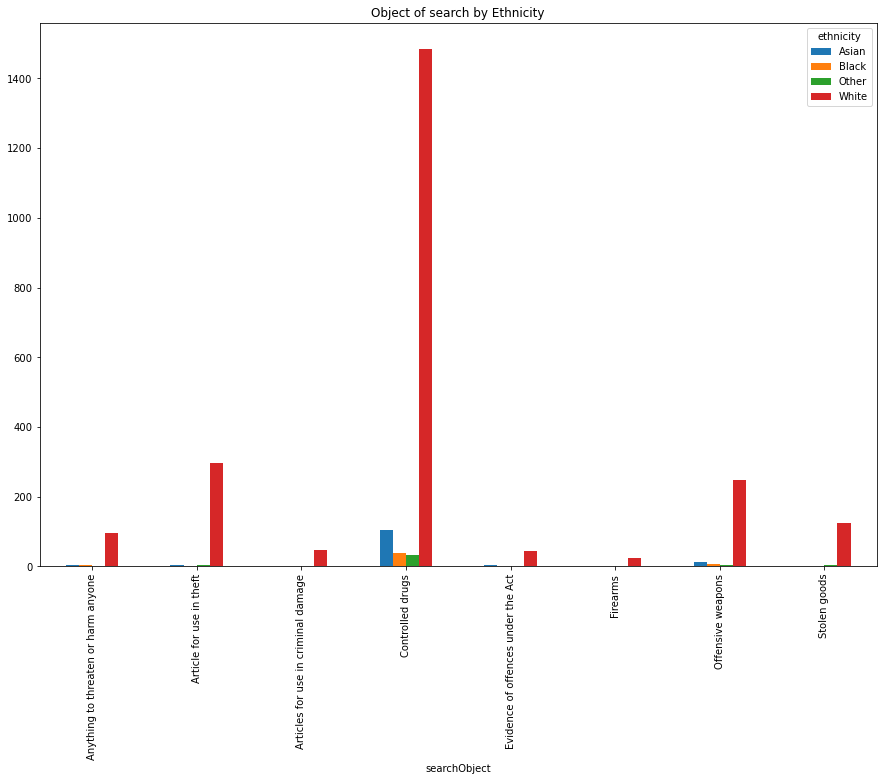

In [39]:
df1.groupby('ethnicity')['searchObject'].value_counts().unstack(0).plot.bar(title='Object of search by Ethnicity', figsize=(15,10));

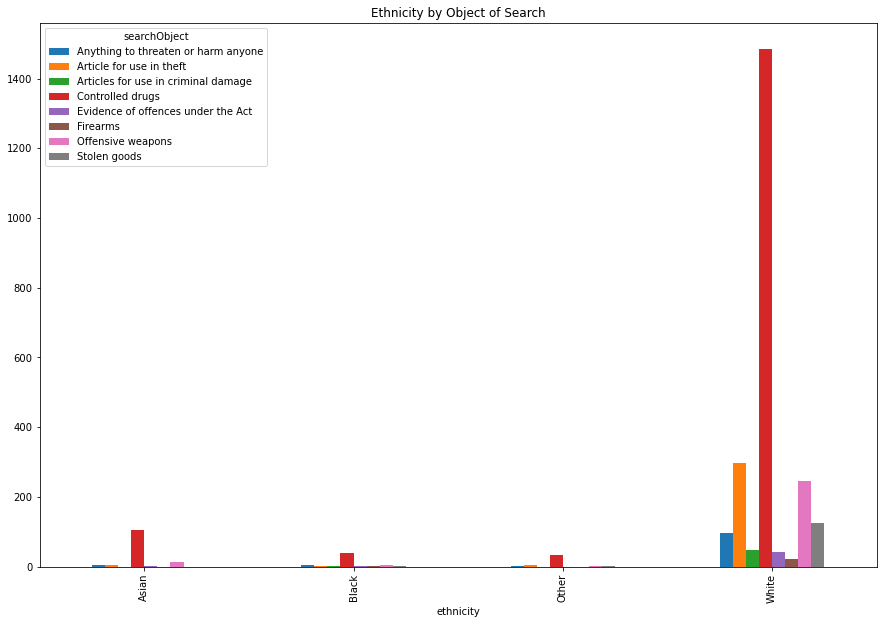

In [40]:
df1.groupby('searchObject')['ethnicity'].value_counts().unstack(0).plot.bar(title='Ethnicity by Object of Search', figsize=(15,10));

In [41]:
gender_male = df1.Gender == 'Male'
gender_female = df1.Gender == 'Female'
gender_other = df1.Gender == 'Other'
gender_male

1       True
2       True
7       True
8       True
9       True
        ... 
5691    True
5694    True
5696    True
5697    True
5705    True
Name: Gender, Length: 2591, dtype: bool

In [42]:
male_percentage = df1.Gender[gender_male].count() / len(df1)
female_percentage = df1.Gender[gender_female].count() / len(df1)
other_percentage = df1.Gender[gender_other].count() / len(df1)

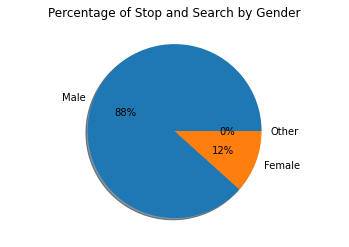

In [43]:
# this will plot a pie chart for us
labels = 'Male', 'Female', 'Other'
fractions = [male_percentage, female_percentage, other_percentage]
explode = (0.0,0,0)
plt.axis("equal")
plt.title('Percentage of Stop and Search by Gender')
plt.pie(fractions, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

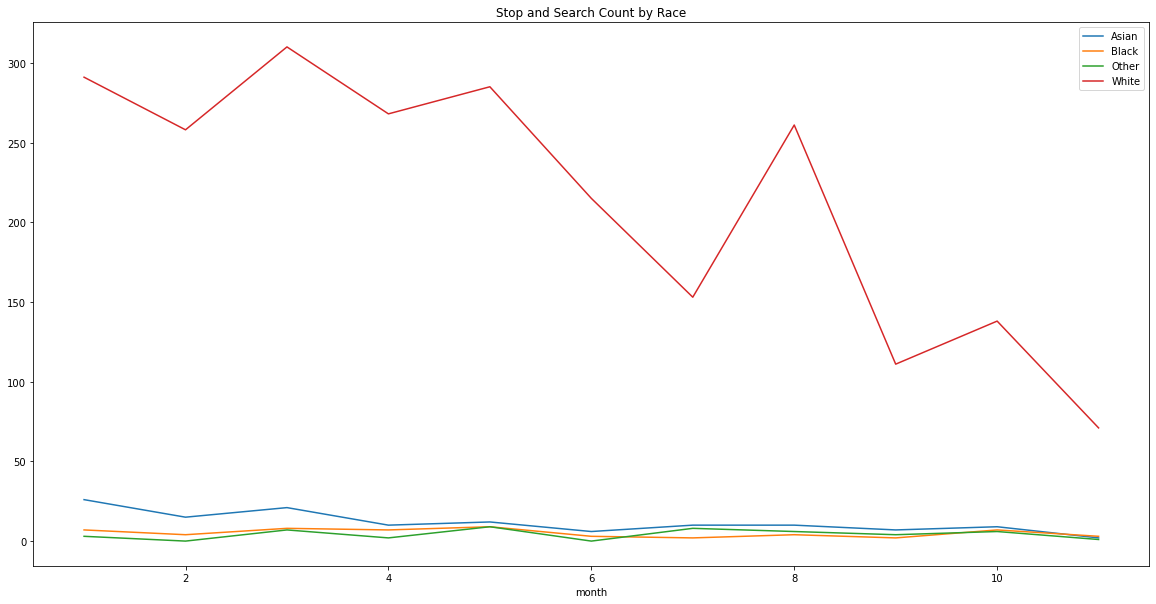

In [44]:
race_count = df1.groupby('month')
race_count = race_count.ethnicity.apply(pd.value_counts).unstack(-1).fillna(0)

race_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Race');

# How many teenagers were stopped and searched by Cleveland Police in 2021?

<AxesSubplot:xlabel='month', ylabel='count'>

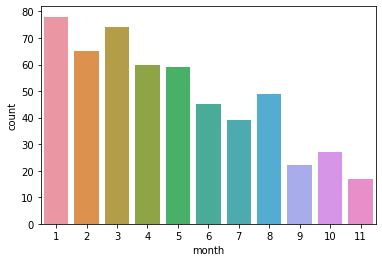

In [25]:
teenagerPlot = df1.loc[df1['ageRange'] == '18-24' ]
teenagerPlot
sns.countplot(x='month', data=teenagerPlot)

# What is the breakdown of age ranges for stop and search for a given police force each month?

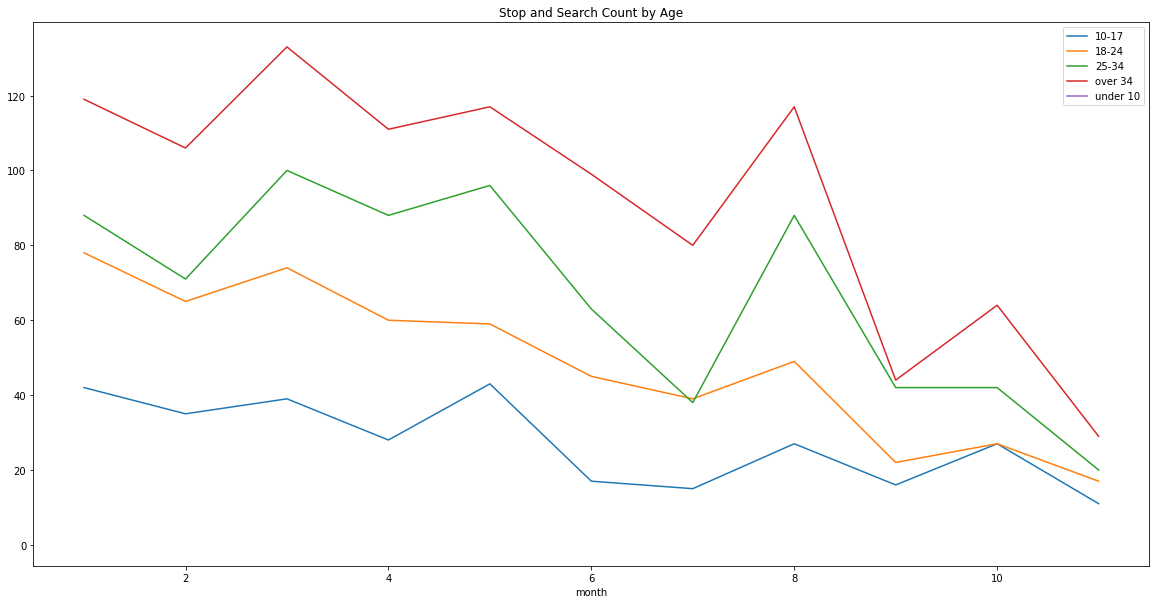

In [93]:
age_count = df1.groupby('month')
age_count = age_count.ageRange.apply(pd.value_counts).unstack(-1)
age_count.plot(kind='line', figsize=(20,10), title='Stop and Search Count by Age');